<a href="https://colab.research.google.com/github/SalvadorRdR/IAC-2022/blob/main/Modelo_IGRF_13_IAC2022_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


In [2]:
!git clone https://github.com/klaundal/ppigrf.git #Hacemos la clonacion de la libreria PPIGRF

fatal: destination path 'ppigrf' already exists and is not an empty directory.


In [3]:
import ppigrf

#Data

In [4]:
from datetime import datetime
h   = 614       # kilometers above sea level
date = datetime(2014, 8, 17) #El dia del estudio

Los intervalos de la latitus y longitud que se quiere simular
$$Slice (Lat_{min} , Lat_{max} +dy ,dy) $$
$$Slice (Lon_{min} , Lon_{max} +dx ,dx) $$

In [13]:
#Y-->Latitud
#X-->Longitud
dx, dy = 0.06, 0.06                  # Resolución de cada punto, 
Lat, Lon = np.mgrid[slice(-23, 23 + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(-111, -34 + dx, dx)]

In [14]:
Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)

In [15]:
Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto

##Plot

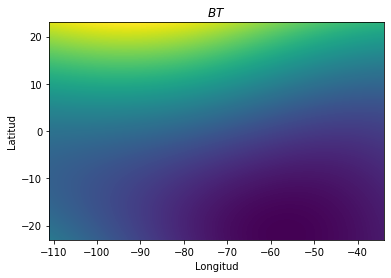

In [18]:

plt.pcolormesh(Lon, Lat,np.squeeze(Bt))
plt.xticks(range(-110,-31,10)) #plt.xticks(range(min(x), max(x)+1, espacios))
plt.title('$BT $')
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)

plt.show()

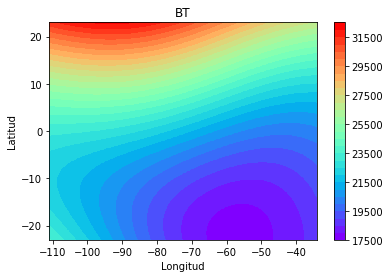

In [19]:

Bt=np.squeeze(Bt)
levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
cmap = plt.get_cmap('rainbow')                             # Tipo de mapa
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)  # Incluimos las valores para el borde del gráfico

fig, ax = plt.subplots()

im = ax.pcolormesh(Lon, Lat, Bt, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title('BT')
plt.xticks(range(-110,-31,10))
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)
plt.show()

In [20]:
Lon.shape,Lat.shape, Bt.shape

((768, 1285), (768, 1285), (768, 1285))

#Date Frame

In [21]:
df = pd.DataFrame(Bt,index=Lat[:,0],columns=Lon[0,:]) #Donde cada "y" representa el valor de cada posicion de la Latitud y el "x" representa cada valor de la Longitud.... [Lat,Lon]=Campo magentico(Btij) en ese punto 
print('DataFrame:')
print(df)

DataFrame:
             -111.00       -110.94       -110.88       -110.82       -110.76  \
-23.00  23622.420962  23614.267532  23606.112096  23597.954641  23589.795156   
-22.94  23609.834662  23601.699708  23593.562761  23585.423807  23577.282836   
-22.88  23597.291882  23589.175424  23581.056983  23572.936549  23564.814109   
-22.82  23584.792774  23576.694829  23568.594914  23560.493017  23552.389127   
-22.76  23572.337487  23564.258073  23556.176702  23548.093361  23540.008038   
...              ...           ...           ...           ...           ...   
 22.78  31238.309525  31243.018237  31247.717588  31252.407536  31257.088038   
 22.84  31264.808135  31269.524829  31274.232142  31278.930033  31283.618458   
 22.90  31291.314553  31296.039190  31300.754426  31305.460219  31310.156528   
 22.96  31317.828648  31322.561187  31327.284306  31331.997962  31336.702115   
 23.02  31344.350287  31349.090688  31353.821650  31358.543130  31363.255086   

             -110.70       -

In [22]:
df.to_csv('MagneticField_T.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


In [23]:
file_name='modelo-igrf13-ctic.xlsx'
df.to_excel(file_name)

In [24]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


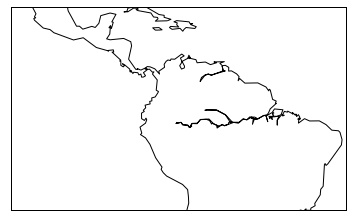

In [27]:
from mpl_toolkits.basemap import Basemap

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='mill',llcrnrlat=-23,urcrnrlat=23,\
            llcrnrlon=-111,urcrnrlon=-34,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='white')
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='white')
#plt.title("Miller Cylindrical Projection")

plt.show()